In [29]:
import pandas as pd
import numpy as np
import ast
import pickle
from pathlib import Path
import multirecording_spikeanalysis_edit as spike
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

rce2_competitive_trial_timestamps = pickle.load(open('rce2_competitive_trial_timestamps.pkl', 'rb'))

# Construct the path in a platform-independent way (HiPerGator or Windows)
ephys_path = Path('.') / 'export' / 'updated_phys' / 'non-novel' / 'all_non_novel'

ephys_data = spike.EphysRecordingCollection(str(ephys_path))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230618_100636_standard_comp_to_omission_D2_subj_1-1_t1b2L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230618_100636_standard_comp_to_omission_D2_subj_1-4_t4b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged.rec
<class

In [2]:
rce2_comp_times2 = {}
delete_recordings = []

for key in rce2_competitive_trial_timestamps.keys():
    split_key = key.split('_subj_')
    subj = split_key[1][:3]
    subj_formatted = subj.replace('_', '-')
    updated_key = f"{split_key[0]}_subj_{subj_formatted}"
    rce2_comp_times2[updated_key] = rce2_competitive_trial_timestamps[key]
    
for recording in ephys_data.collection.keys():
    # Check if the recording key (without everything after subject #) is in timestamp_dicts
    start_pos = recording.find('subj_')
    # Add the length of 'subj_' and 3 additional characters to include after 'subj_'
    end_pos = start_pos + len('subj_') + 3
    # Slice the recording key to get everything up to and including the subject identifier plus three characters
    recording_key_without_suffix = recording[:end_pos]
    if recording_key_without_suffix in rce2_comp_times2:
        # Assign the corresponding timestamp_dicts dictionary to event_dict
        ephys_data.collection[recording].event_dict = rce2_comp_times2[recording_key_without_suffix]
        
        # Extract the subject from the recording key
        start = recording.find('subj_') + 5  # Start index after 'subj_'
        subject = recording[start:start+3]
        
        # Assign the extracted subject
        ephys_data.collection[recording].subject = subject
        
        print(recording, ' event_dict and subject assigned')

    else:
        delete_recordings.append(recording)
        print(recording, ' not in source dict, will be deleted')

for recording in delete_recordings:
    del ephys_data.collection[recording]

del ephys_data.collection['20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec']

20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec  not in source dict, will be deleted
20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec  event_dict and subject assigned
20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged.rec  event_dict and subject assigned
20230618_100636_standard_comp_to_omission_D2_subj_1-1_t1b2L_box2_merged.rec  event_dict and subject assigned
20230618_100636_standard_comp_to_omission_D2_subj_1-4_t4b3L_box1_merged.rec  event_dict and subject assigned
20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec  not in source dict, will be deleted
20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged.rec  event_dict and subject assigned
20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged.rec  event_dict and subject assigned
20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec  event_dict and subject assigned
20230622_

In [3]:
spike_analysis = spike.SpikeAnalysis_MultiRecording(ephys_data, timebin = 100, smoothing_window=250, ignore_freq = 0.5)

All set to analyze


In [4]:
event_keys = ['win_competitive',
 'lose_no_comp',
 'lose_competitive',
 'win_no_comp']
event_dfs = []
for event in event_keys:
#    if event != 'lose_competitive':
        df_name = event + '_df'
        df_name = spike_analysis.wilcox_baseline_v_event_collection(event, 10, 10, plot=False)
        event_dfs.append(df_name)
        print(event, ' completed')

Wilcoxon can't be done on 20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged.rec win_competitive, because <6 samples
Wilcoxon can't be done on 20230618_100636_standard_comp_to_omission_D2_subj_1-4_t4b3L_box1_merged.rec win_competitive, because <6 samples
Wilcoxon can't be done on 20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged.rec win_competitive, because <6 samples
Wilcoxon can't be done on 20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec win_competitive, because <6 samples
Wilcoxon can't be done on 20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-1_t1b3L_box1_merged.rec win_competitive, because <6 samples
Wilcoxon can't be done on 20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-2_t3b3L_box1_merged.rec win_competitive, because <6 samples
Wilcoxon can't be done on 20230624_105855_standard_comp_to_both_rewarded_D3_subj_1-4_t3b3L_box1_merged.rec win_competitive, because <6 samples
Wilcoxon can't be 

In [5]:
# Step 1: Concatenate the DataFrames
combined_df = pd.concat(event_dfs)

# Function to extract just the event name
def extract_event_name(event):
    # Splits the string and extracts the part before 'vs'
    return event.split(' vs ')[0].replace('10s ', '')

# Initialize an empty dictionary to hold aggregated data
aggregated_data = {}

# Iterate over the rows of the combined DataFrame
for index, row in combined_df.iterrows():
    # Extract event name
    event_name = extract_event_name(row['Event'])
    # Construct a unique key for each combination of recording, subject, and unit id
    key = (row['Recording'], row['Subject'], row['original unit id'])
    
    # Initialize the entry if not exists
    if key not in aggregated_data:
        aggregated_data[key] = {'sig_increase_events': set(), 'sig_decrease_events': set(), 'insig_events': set()}
    
    # Append the event name to the appropriate category based on 'event1 vs event2'
    if row['event1 vs event2'] == 'increases':
        aggregated_data[key]['sig_increase_events'].add(event_name)
    elif row['event1 vs event2'] == 'decreases':
        aggregated_data[key]['sig_decrease_events'].add(event_name)
    elif row['event1 vs event2'] == 'not significant':
        aggregated_data[key]['insig_events'].add(event_name)

# Convert the aggregated data into a DataFrame
rows = []
for (recording, subject, unit_id), categories in aggregated_data.items():
    row = {
        'Recording': recording,
        'Subject': subject,
        'original unit id': unit_id,
        'sig_increase_events': ', '.join(categories['sig_increase_events']),
        'sig_decrease_events': ', '.join(categories['sig_decrease_events']),
        'insig_events': ', '.join(categories['insig_events'])
    }
    rows.append(row)

aggregated_df = pd.DataFrame(rows)

In [6]:
# Function to normalize event strings
def normalize_event_string(event_string):
    event_list = event_string.split(', ')
    event_list_sorted = sorted(event_list)  # Sort the list to ensure consistent order
    return ', '.join(event_list_sorted)  # Join the sorted list back into a string

aggregated_df['all_events'] = aggregated_df.apply(lambda row: ', '.join(filter(None, [row['sig_increase_events'], row['sig_decrease_events'], row['insig_events']])), axis=1)
aggregated_df['all_events'] = aggregated_df['all_events'].apply(normalize_event_string)

aggregated_df['sig_events'] = aggregated_df.apply(lambda row: ', '.join(filter(None, [row['sig_increase_events'], row['sig_decrease_events']])), axis=1)
aggregated_df['sig_events'] = aggregated_df['sig_events'].apply(normalize_event_string)

In [7]:
lose_df = aggregated_df[aggregated_df['all_events'] == 'lose_competitive, lose_no_comp']

In [8]:
win_df = aggregated_df[aggregated_df['all_events'] == 'win_competitive, win_no_comp']

In [15]:
# Count the unique combinations of significant events
win_sig_counts = win_df['sig_events'].value_counts()

# Rename the empty strings to 'non-specific'
win_sig_counts = win_sig_counts.rename(index={'': 'Non-Responsive', 'win_competitive': 'Competitive Win', 'win_no_comp': 'Non-Competitive Win'})

In [16]:
win_sig_counts['Both'] = win_sig_counts[[',' in index for index in win_sig_counts.index]].sum()
win_sig_counts = win_sig_counts.drop(win_sig_counts[[',' in index for index in win_sig_counts.index]].index)

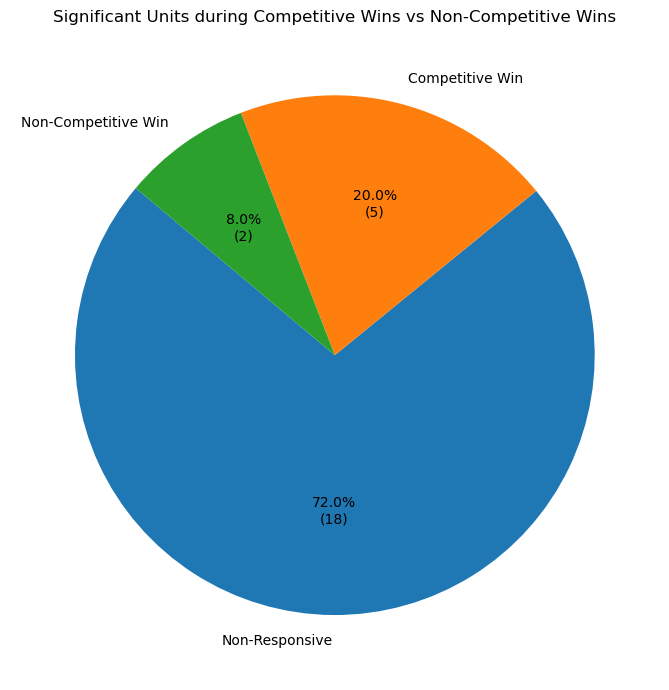

In [19]:
# Define a custom autopct function
def custom_autopct(pct, allvalues):
    absolute = int(round(pct/100.*sum(allvalues)))
    return f"{pct:.1f}%\n({absolute:d})"

win_sig_counts = win_sig_counts[win_sig_counts > 0]

# Plot
plt.figure(figsize=(10, 7))
plt.pie(win_sig_counts, labels=win_sig_counts.index, autopct=lambda pct: custom_autopct(pct, win_sig_counts), startangle=140)
plt.title('Significant Units during Competitive Wins vs Non-Competitive Wins')
plt.tight_layout()
plt.show()

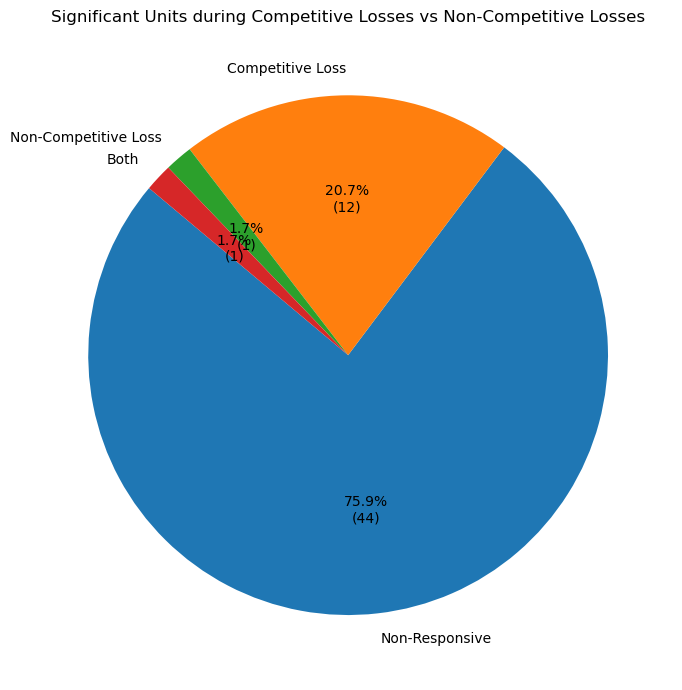

In [24]:
# Count the unique combinations of significant events
lose_sig_counts = lose_df['sig_events'].value_counts()

# Rename the empty strings to 'non-specific'
lose_sig_counts = lose_sig_counts.rename(index={'': 'Non-Responsive', 'lose_competitive': 'Competitive Loss', 'lose_no_comp': 'Non-Competitive Loss'})

lose_sig_counts['Both'] = lose_sig_counts[[',' in index for index in lose_sig_counts.index]].sum()
lose_sig_counts = lose_sig_counts.drop(lose_sig_counts[[',' in index for index in lose_sig_counts.index]].index)

lose_sig_counts = lose_sig_counts[lose_sig_counts > 0]

# Plot
plt.figure(figsize=(10, 7))
plt.pie(lose_sig_counts, labels=lose_sig_counts.index, autopct=lambda pct: custom_autopct(pct, lose_sig_counts), startangle=140)
plt.title('Significant Units during Competitive Losses vs Non-Competitive Losses')
plt.tight_layout()
plt.show()

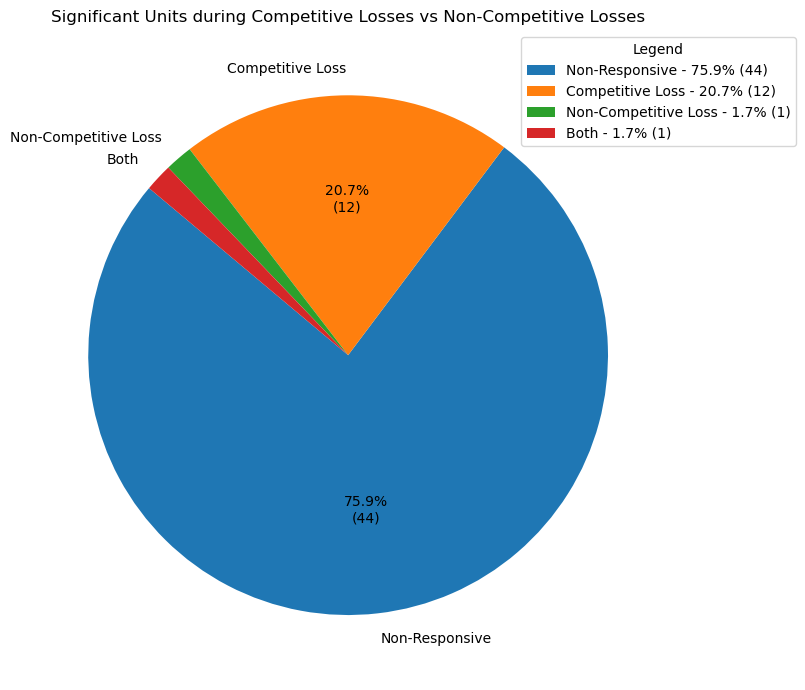

In [45]:
# Define a custom autopct function
def custom_autopct(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    if pct > 3:
        return f"{pct:.1f}%\n({absolute:d})"
    return ''

# Define the custom legend labels
def custom_legend_labels(value, pct, label):
    absolute = int(value)
    return f'{label} - {pct:.1f}% ({absolute:d})'

# Plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(
    lose_sig_counts, labels=lose_sig_counts.index,
    autopct=lambda pct: custom_autopct(pct, lose_sig_counts), startangle=140
)

# Customize legend
total = sum(lose_sig_counts)
legend_labels = [
    custom_legend_labels(value, (value / total) * 100, label)
    for value, label in zip(lose_sig_counts, lose_sig_counts.index)
]
ax.legend(wedges, legend_labels, title="Legend", loc="upper right", bbox_to_anchor=(.7, 0, 0.5, 1))

plt.title('Significant Units during Competitive Losses vs Non-Competitive Losses')
plt.tight_layout()
plt.show()

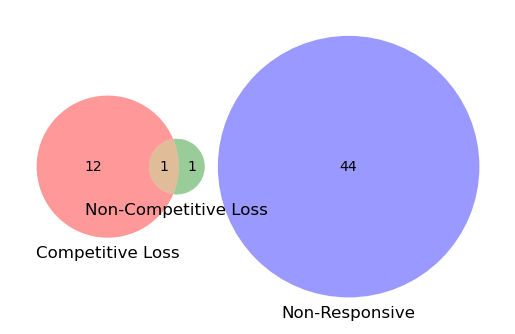

In [33]:
venn3(subsets = (lose_sig_counts['Competitive Loss'], lose_sig_counts['Non-Competitive Loss'], lose_sig_counts['Both'], lose_sig_counts['Non-Responsive'], 0, 0, 0), set_labels = ('Competitive Loss', 'Non-Competitive Loss', 'Non-Responsive'))

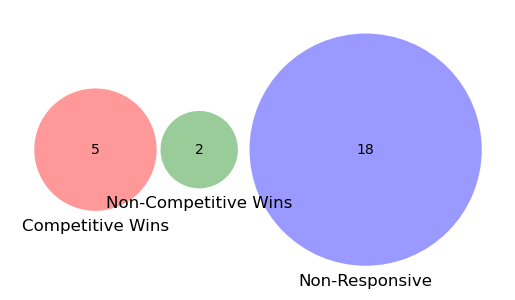

In [37]:
venn3(subsets = (win_sig_counts['Competitive Win'], win_sig_counts['Non-Competitive Win'], win_sig_counts.get('Both', 0), win_sig_counts['Non-Responsive'], 0, 0, 0), set_labels = ('Competitive Wins', 'Non-Competitive Wins', 'Non-Responsive'))